In [1]:
import json

In [2]:
with open('imdb_actors.json', 'r') as actors_file:
    actor_data = json.load(actors_file)

In [8]:
actor_data[0]['titles'][0][0]

'tt5697510'

In [6]:
# for each actor:
# get their ID
# for each movie:
# insert into moviesxactors:
# (title_id, actor_id)
#

In [14]:
import config

In [16]:
import mysql.connector

In [17]:
import db_funcs

In [18]:
conn = db_funcs.get_db_conn(config)

In [19]:
conn

In [20]:
cursor = conn.cursor()

In [21]:
test_list = actor_data[0:5]

In [28]:
all_the_rest = actor_data[6:]

In [24]:
def populate_actors_movies(cursor, actor_list):
    insert_str = """insert into moviesxactors (title_id, actor_id) values (%s, %s)"""
    for actor in actor_list:
        actor_id = actor['actor_id']
        for movie in actor['titles']:
            title_id = movie[0]
            values = (title_id, actor_id)
            cursor.execute(insert_str, values)

In [29]:
populate_actors_movies(cursor, all_the_rest)

In [30]:
conn.commit()

In [60]:
conn.close()

In [70]:
query = """select distinct (title), actors.first_name, actors.last_name, actors.pop_rank, format(bo_ww, 0)
from movies
join moviesxactors
using(title_id)
join actors
using(actor_id)
where actors.pop_rank and bo_ww != 0
-- order by actors.pop_rank asc
group by title
order by bo_ww desc"""

In [71]:
query

'select distinct (title), actors.first_name, actors.last_name, actors.pop_rank, format(bo_ww, 0)\nfrom movies\njoin moviesxactors\nusing(title_id)\njoin actors\nusing(actor_id)\nwhere actors.pop_rank and bo_ww != 0\n-- order by actors.pop_rank asc\ngroup by title\norder by bo_ww desc'

In [84]:
conn = db_funcs.get_db_conn(config)

In [85]:
cursor = conn.cursor()

In [80]:
cursor

In [83]:
conn.close()

In [86]:
cursor.execute("""select distinct (title), actors.first_name, actors.last_name, actors.pop_rank, format(bo_ww, 0)
from movies
join moviesxactors
using(title_id)
join actors
using(actor_id)
where actors.pop_rank and bo_ww != 0
-- order by actors.pop_rank asc
group by title
order by bo_ww desc""")

NoneType

In [89]:
results = cursor.fetchall()

In [96]:
results

[('Avengers: Endgame (2019)', 'Chris', 'Evans', 1, '2,147,483,647'),
 ('Titanic (1997)', 'Leonardo', 'DiCaprio', 28, '2,147,483,647'),
 ('Star Wars: Episode VII - The F', 'Daisy', 'Ridley', 45, '2,068,223,624'),
 ('Avengers: Infinity War (2018)', 'Chris', 'Evans', 1, '2,048,709,917'),
 ('Jurassic World (2015)', 'Chris', 'Pratt', 26, '1,671,713,208'),
 ('The Avengers (2012)', 'Chris', 'Evans', 1, '1,519,557,910'),
 ('Furious 7 (2015)', 'Dwayne', 'Johnson', 20, '1,516,045,911'),
 ('Avengers: Age of Ultron (2015)', 'Chris', 'Evans', 1, '1,405,413,868'),
 ('Star Wars: Episode VIII - The ', 'Daisy', 'Ridley', 45, '1,332,539,889'),
 ('Jurassic World: Fallen Kingdom', 'Chris', 'Pratt', 26, '1,309,484,461'),
 ('Incredibles 2 (2018)', 'Samuel', 'Jackson', 27, '1,242,770,554'),
 ('The Fate of the Furious (2017)', 'Dwayne', 'Johnson', 20, '1,238,764,765'),
 ('Iron Man Three (2013)', 'Robert', 'Downey', 2, '1,215,439,994'),
 ('Captain America: Civil War (20', 'Chris', 'Evans', 1, '1,153,304,495'),

In [65]:
import pandas as pd

In [90]:
df = pd.DataFrame(results)

In [91]:
df

,0,1,2,3,4
0,Avengers: Endgame (2019),Chris,Evans,1,"2,147,483,647"
1,Titanic (1997),Leonardo,DiCaprio,28,"2,147,483,647"
2,Star Wars: Episode VII - The F,Daisy,Ridley,45,"2,068,223,624"
3,Avengers: Infinity War (2018),Chris,Evans,1,"2,048,709,917"
4,Jurassic World (2015),Chris,Pratt,26,"1,671,713,208"
5,The Avengers (2012),Chris,Evans,1,"1,519,557,910"
6,Furious 7 (2015),Dwayne,Johnson,20,"1,516,045,911"
7,Avengers: Age of Ultron (2015),Chris,Evans,1,"1,405,413,868"
8,Star Wars: Episode VIII - The,Daisy,Ridley,45,"1,332,539,889"
9,Jurassic World: Fallen Kingdom,Chris,Pratt,26,"1,309,484,461"


/Users/markbrennan/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/markbrennan/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


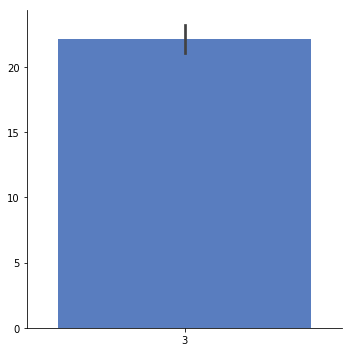

In [95]:
# Import necessarily libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
#titanic = sns.load_dataset("titanic")

# Set up a factorplot
g = sns.factorplot(data=df, kind="bar", palette="muted", legend=False)
                   
# Show plot
plt.show()